### Using LISST GSD data to compare water column sediment sizes in suspension

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

# turbidity data
turb_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SP23_clean_complete.csv')
turb_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SM23_clean_complete.csv')
# GSD data
GSD_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Spring_2023_watercolumn_percentage.csv')
GSD_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Summer_2023_watercolumn_percentage.csv')
# depth and discharge data
depths = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/2023_water_depth.csv')
q_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/discharge_summer2023_power.csv')
q_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/discharge_spring2023_power.csv')
# suspended sediment concentration data
SSC_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_summer2023.csv')
SSC_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_spring2023.csv')

# Correct datetime conversion and timezone localization
SSC_SM23['Date_Time'] = pd.to_datetime(SSC_SM23['Date_Time']).dt.tz_localize(None)
SSC_SP23['Date_Time'] = pd.to_datetime(SSC_SP23['Date_Time']).dt.tz_localize(None)
turb_SP23['DateTime'] = pd.to_datetime(turb_SP23['DateTime']).dt.tz_localize(None)
turb_SM23['DateTime'] = pd.to_datetime(turb_SM23['DateTime']).dt.tz_localize(None)
# convert the column to floats, ignoring errors
SSC_SM23['SSC (mg/L)'] = pd.to_numeric(SSC_SM23['SSC (mg/L)'], errors='coerce')
SSC_SP23['SSC (mg/L)'] = pd.to_numeric(SSC_SP23['SSC (mg/L)'], errors='coerce')

Plot turbidity and SSC concentration time series

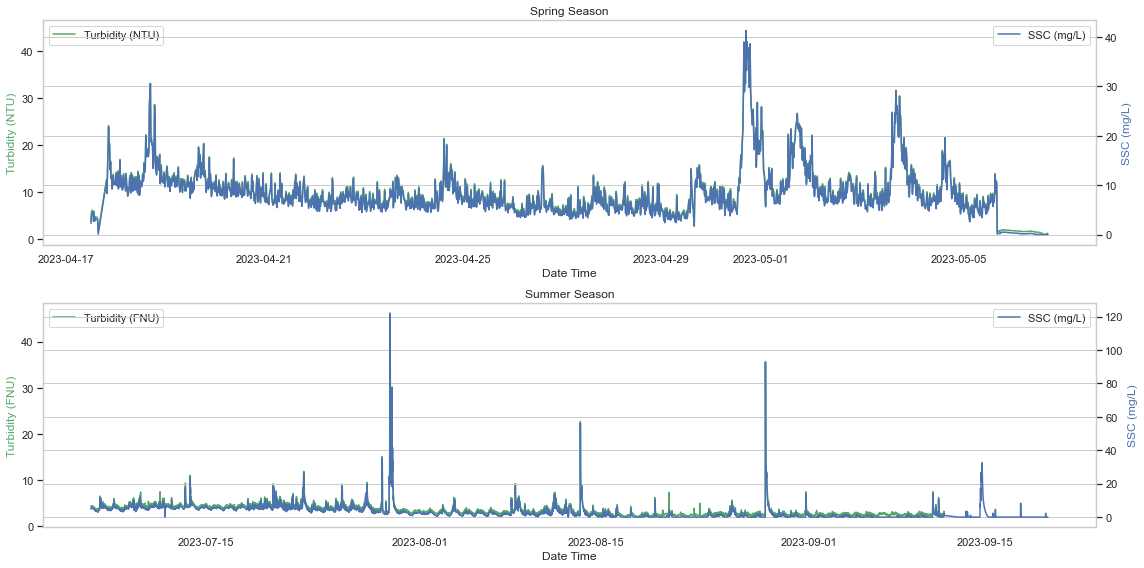

In [2]:
# Plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax1 = plt.subplots(2, 1, figsize=(16, 8)) 

# spring
ax2 = ax1[0].twinx()  # create a second y-axis for the SSC concentration
ax1[0].plot(turb_SP23['DateTime'], turb_SP23['Upstream'], 'g-', label='Turbidity (NTU)')
ax2.plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'b-', label='SSC (mg/L)')

ax1[0].set_xlabel('Date Time')
ax1[0].set_ylabel('Turbidity (NTU)', color='g')
ax2.set_ylabel('SSC (mg/L)', color='b')
ax1[0].set_title('Spring Season')
ax1[0].legend(loc='upper left')
ax2.legend(loc='upper right')

# Summer
ax2 = ax1[1].twinx()  # create a second y-axis for the SSC concentration
ax1[1].plot(turb_SM23['DateTime'], turb_SM23['Upstream'], 'g-', label='Turbidity (FNU)')
ax2.plot(SSC_SM23['Date_Time'], SSC_SM23['SSC (mg/L)'], 'b-', label='SSC (mg/L)')

ax1[1].set_xlabel('Date Time')
ax1[1].set_ylabel('Turbidity (FNU)', color='g')
ax2.set_ylabel('SSC (mg/L)', color='b')
ax1[1].set_title('Summer Season')
ax1[1].legend(loc='upper left')
ax2.legend(loc='upper right')

# no grid
ax1[0].grid(False)
ax1[1].grid(False)
plt.tight_layout()
plt.show()


In [3]:
# see max turbidity value in spring and summer
print('Spring max turbidity:', turb_SP23['Upstream'].max(), '(NTU)')
print('Summer max turbidity:', turb_SM23['Upstream'].max(), '(FNU)')

Spring max turbidity: 44.37951 (NTU)
Summer max turbidity: 46.17 (FNU)


### Cleanup GSD data

In [4]:
# set first column as index
GSD_SP23.set_index('lab_ID', inplace=True)
GSD_SM23.set_index('lab_ID', inplace=True)
# transpose the data
GSD_SP23 = GSD_SP23.T
GSD_SM23 = GSD_SM23.T
# separate by upstream and downstream samples for the spring samples
GSD_SP23_up = GSD_SP23[GSD_SP23['sample'].str.startswith('UP')].copy()
GSD_SP23_down = GSD_SP23[GSD_SP23['sample'].str.startswith('D')].copy()
# set date time column in datetime format
GSD_SP23_up.loc[:, 'datetime'] = pd.to_datetime(GSD_SP23_up.loc[:, 'datetime'])
GSD_SP23_down.loc[:, 'datetime'] = pd.to_datetime(GSD_SP23_down.loc[:, 'datetime'])
# sort by date
GSD_SP23_up = GSD_SP23_up.sort_values(by='datetime')
GSD_SP23_down = GSD_SP23_down.sort_values(by='datetime')

Plot turbidity and SSC concentration time series

ValueError: x and y must be the same size

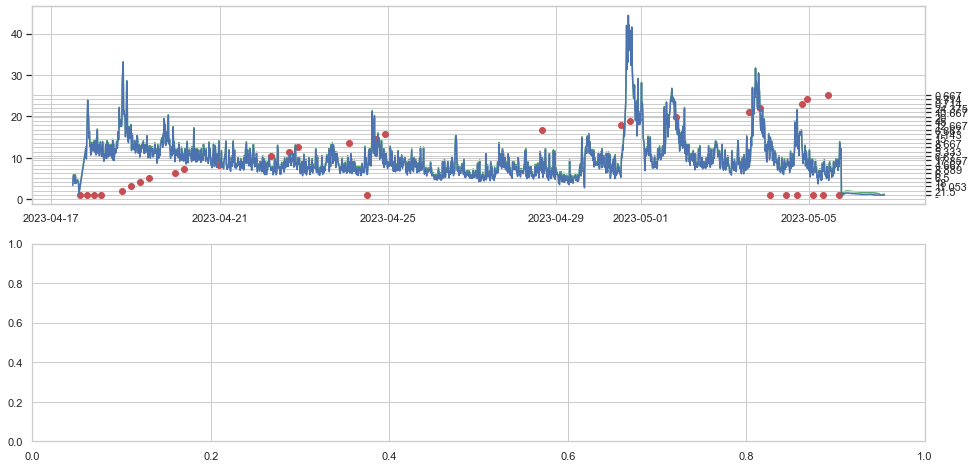

In [6]:
# Plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax1 = plt.subplots(2, 1, figsize=(16, 8)) 

# spring
ax2 = ax1[0].twinx()  # create a second y-axis for the SSC concentration
ax1[0].plot(turb_SP23['DateTime'], turb_SP23['Upstream'], 'g-', label='Turbidity (NTU)')
ax2.plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'b-', label='SSC (mg/L)')
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['SSC (mg/L)'], c='r', marker='o', label='Upstream SSC (mg/L)')
ax2.scatter(GSD_SP23_down['datetime'], GSD_SP23_up['SSC (mg/L)'], c='purple', marker='o', label='Downstream SSC (mg/L)')

ax1[0].set_xlabel('Date Time')
ax1[0].set_ylabel('Turbidity (NTU)', color='g')
ax2.set_ylabel('SSC (mg/L)', color='b')
ax1[0].set_title('Spring Season')
ax1[0].legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9)) 

# Summer
ax2 = ax1[1].twinx()  # create a second y-axis for the SSC concentration
ax1[1].plot(turb_SM23['DateTime'], turb_SM23['Upstream'], 'g-', label='Turbidity (FNU)')
ax2.plot(SSC_SM23['Date_Time'], SSC_SM23['SSC (mg/L)'], 'b-', label='SSC (mg/L)')

ax1[1].set_xlabel('Date Time')
ax1[1].set_ylabel('Turbidity (FNU)', color='g')
ax2.set_ylabel('SSC (mg/L)', color='b')
ax1[1].set_title('Summer Season')
ax1[1].legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# no grid
ax1[0].grid(False)
ax1[1].grid(False)
plt.tight_layout()
plt.show()